# 10주차 과제
- 60171100 윤민혁

In [115]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Okt # 형태소 분석기
from collections import Counter # 빈도를 측정하기
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [116]:
pre = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=68555&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page='
review=[]
rate=[]

for i in range(1,3780, 50):
    site = pre + str(i)
    res = requests.get(site)
    soup = BeautifulSoup(res.content,'html.parser')
    
    id_list = []
    id_pre = '_filtered_ment_'
    
    for i in range(10):
        id_list.append(id_pre+str(i))
   
    for id in id_list:
        review.append(soup.find('span',{'id':id}).get_text().strip())
        
    rate_list = []
    rate_list = (soup.select('div.star_score > em'))
    
    for r in rate_list:
        r = int(re.sub('<.+?>','',str(r)))
        rate.append(r)

        
df = pd.DataFrame({'review':review,'rate':rate})

In [117]:
df

,review,rate
0,"이게 진짜 명작이다.... 보기전, 대만영화라서 편견이 있었는데, 완전히 반성한다....",10
1,몇번봐도 너무 재미씀,10
2,이런 영화 다시 안나오나..?,10
3,너무너무좋아...,10
4,영화 전문가들은 대체 어느영화에 10점을 줄지 궁금하다,10
...,...,...
755,별로..별로안좋아요..,1
756,학교에서 봤는데...영...,1
757,무언가 많이 어색한 영화 끝가지 보려고 노력했지만 ....,1
758,초중딩영화,1


In [118]:
okt = Okt()

In [119]:
word_list = []
word_list = df['review']

In [120]:
sentences_tag = []

for sentence in word_list:
    morph = okt.pos(sentence) #특정 문장에 대한 품사를 분석해줌
    sentences_tag.append(morph)

In [121]:
sentences_tag

[[('이', 'Noun'),
  ('게', 'Josa'),
  ('진짜', 'Noun'),
  ('명작', 'Noun'),
  ('이다', 'Josa'),
  ('....', 'Punctuation'),
  ('보기전', 'Verb'),
  (',', 'Punctuation'),
  ('대', 'Modifier'),
  ('만', 'Modifier'),
  ('영화', 'Noun'),
  ('라서', 'Josa'),
  ('편견', 'Noun'),
  ('이', 'Josa'),
  ('있었는데', 'Adjective'),
  (',', 'Punctuation'),
  ('완전히', 'Adjective'),
  ('반성', 'Noun'),
  ('한', 'Josa'),
  ('다', 'Adverb'),
  ('....', 'Punctuation')],
 [('몇번', 'Noun'),
  ('봐도', 'Verb'),
  ('너무', 'Adverb'),
  ('재미', 'Noun'),
  ('씀', 'Verb')],
 [('이런', 'Adjective'),
  ('영화', 'Noun'),
  ('다시', 'Noun'),
  ('안', 'VerbPrefix'),
  ('나오나', 'Verb'),
  ('..?', 'Punctuation')],
 [('너무', 'Adverb'),
  ('너무', 'Adverb'),
  ('좋아', 'Adjective'),
  ('...', 'Punctuation')],
 [('영화', 'Noun'),
  ('전문가', 'Noun'),
  ('들', 'Suffix'),
  ('은', 'Josa'),
  ('대체', 'Noun'),
  ('어느', 'Modifier'),
  ('영화', 'Noun'),
  ('에', 'Josa'),
  ('10', 'Number'),
  ('점', 'Noun'),
  ('을', 'Josa'),
  ('줄', 'Noun'),
  ('지', 'Josa'),
  ('궁금하다', 'Adjective')],
 [

In [122]:
noun_list = []

for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['Noun']:
            noun_list.append(word)

In [123]:
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:100]

['진짜',
 '명작',
 '영화',
 '편견',
 '반성',
 '몇번',
 '재미',
 '영화',
 '다시',
 '영화',
 '전문가',
 '대체',
 '영화',
 '주걸륜',
 '진짜',
 '천재',
 '명작',
 '지금',
 '정도',
 '진짜',
 '이건',
 '진짜',
 '말로',
 '표현',
 '진짜',
 '주걸륜',
 '생각',
 '이영화',
 '마지막',
 '무서움',
 '평점',
 '네이버',
 '평점',
 '보더',
 '쓰레기',
 '프리',
 '퀀시',
 '동감',
 '졸작',
 '중딩',
 '영화',
 '모든',
 '영화',
 '정도',
 '전혀',
 '최고',
 '영화',
 '스토리',
 '평점',
 '느낌',
 '영화',
 '감독',
 '작품',
 '끼니',
 '고생',
 '하품',
 '그냥',
 '정도',
 '어후',
 '다시',
 '진짜',
 '걸작',
 '피아노',
 '연주',
 '남녀',
 '주인공',
 '감정',
 '계륜미',
 '이영화',
 '지금',
 '중간',
 '장르',
 '확인',
 '은영',
 '스토리',
 '연기',
 '연출',
 '하나',
 '대작',
 '음악',
 '멜로',
 '반전',
 '영화',
 '보기',
 '명작',
 '정말',
 '영화',
 '알바',
 '정밀',
 '감동',
 '여운',
 '영화',
 '계륜미',
 '평점',
 '스토리',
 '반전',
 '평점',
 '주기',
 '정도',
 '위주']

In [124]:
counts = Counter(noun_list)
tags = counts.most_common(50) # most_common은 상위 몇개를 나타내기 위해 사용
tags

[('영화', 275),
 ('최고', 131),
 ('정말', 99),
 ('진짜', 90),
 ('감동', 88),
 ('피아노', 37),
 ('반전', 36),
 ('평점', 33),
 ('완전', 33),
 ('계륜미', 29),
 ('보고', 29),
 ('사랑', 28),
 ('처음', 27),
 ('주걸륜', 23),
 ('명작', 21),
 ('여운', 21),
 ('대박', 21),
 ('이영화', 20),
 ('음악', 20),
 ('후회', 18),
 ('다시', 17),
 ('스토리', 16),
 ('멜로', 16),
 ('생각', 14),
 ('가슴', 14),
 ('최고다', 14),
 ('이해', 14),
 ('지금', 13),
 ('정도', 13),
 ('이건', 11),
 ('마지막', 11),
 ('그냥', 11),
 ('판타지', 11),
 ('사람', 10),
 ('장면', 10),
 ('소름', 10),
 ('몇번', 9),
 ('재미', 9),
 ('작품', 9),
 ('주인공', 9),
 ('쵝오', 9),
 ('배우', 9),
 ('비밀', 9),
 ('느낌', 8),
 ('가장', 8),
 ('감독', 7),
 ('하나', 7),
 ('한번', 7),
 ('여자', 7),
 ('아주', 7)]

In [125]:
# 불필요한 단어 삭제
tags.remove(('영화',275))
tags.remove(('다시',17))
tags.remove(('보고',29))
tags.remove(('이영화',20))

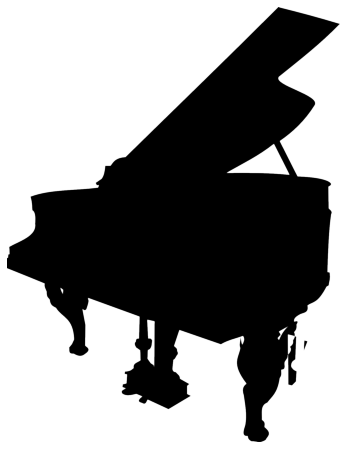

In [126]:
custom_mask = np.array(Image.open("./images/grand-piano-309375.png"))

plt.figure(figsize=(8,8))
plt.imshow(custom_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [127]:
image_colors = ImageColorGenerator(custom_mask)

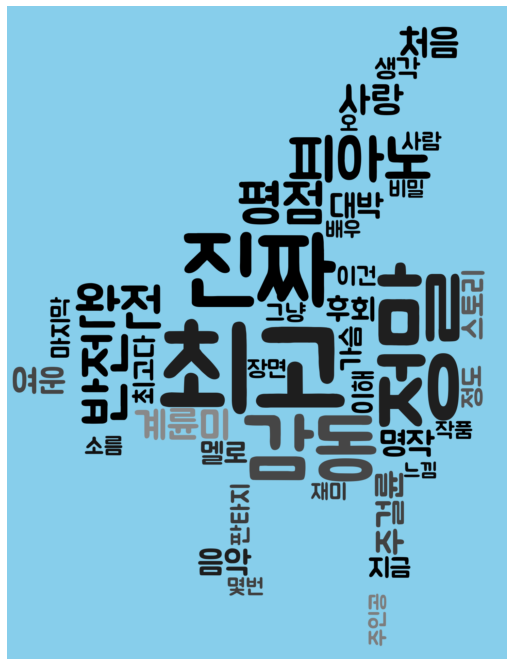

In [143]:
wordcloud = WordCloud(font_path="./BMJUA_ttf (1).ttf",
                     background_color='skyblue',width=800, height=600,
                     max_words=40, mask=custom_mask,
)
cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(cloud.recolor(color_func=image_colors), interpolation='bilinear') # 마스크용 이미지의 색으로 워드클라우드 생성

# 10주차 개인톡과제
- 60171100 윤민혁

In [129]:
from math import log

In [321]:
pre = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=68555&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page='
review=[]
rate=[]
# 처음 한페이지만 리뷰 크롤링
for i in range(1,1000, 1000):
    site = pre + str(i)
    res = requests.get(site)
    soup = BeautifulSoup(res.content,'html.parser')
    
    id_list = []
    id_pre = '_filtered_ment_'
    
    for i in range(10):
        id_list.append(id_pre+str(i))
   
    for id in id_list:
        review.append(soup.find('span',{'id':id}).get_text().strip())
        
    rate_list = []
    rate_list = (soup.select('div.star_score > em'))
    
    for r in rate_list:
        r = int(re.sub('<.+?>','',str(r)))
        rate.append(r)

        
df = pd.DataFrame({'review':review,'rate':rate})

In [322]:
len(df)

10

In [323]:
df.isnull().sum()

review    0
rate      0
dtype: int64

In [324]:
from konlpy.tag import Okt
from collections import Counter

In [325]:
okt = Okt()

In [326]:
word_list = []
word_list = df['review']

In [327]:
sentences_tag = []

for sentence in word_list:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)

In [328]:
noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ["Noun"]:
            noun_list.append(word)

In [337]:
# 2글자 이상만 추출
noun_list = [n for n in noun_list if len(n) > 1]
len(noun_list)

30

In [330]:
docs = noun_list
vocab = list(set(w for doc in docs for w in doc.split()))
             
vocab.sort()

In [331]:
N = len(docs) # 총 문서의 수
def tf(t,d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))
    
def tfidf(t,d):
    return tf(t,d)*idf(t)

In [332]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)
tf_

,다시,대체,마지막,말로,명작,몇번,무서움,반성,생각,영화,...,이영화,재미,전문가,정도,주걸륜,지금,진짜,천재,편견,표현
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [333]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))
    
idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
다시,2.708050
대체,2.708050
마지막,2.708050
말로,2.708050
명작,2.302585
몇번,2.708050
무서움,2.708050
반성,2.708050
생각,2.708050
영화,1.609438


In [334]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tfidf(t, d))
        
tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,다시,대체,마지막,말로,명작,몇번,무서움,반성,생각,영화,...,이영화,재미,전문가,정도,주걸륜,지금,진짜,천재,편견,표현
0,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,1.609438,0.00000,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.00000,2.302585,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,1.609438,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,2.70805,0.00000
4,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,2.70805,0.00000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000
5,0.00000,0.00000,0.00000,0.00000,0.000000,2.70805,0.00000,0.00000,0.00000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000
6,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.00000,2.70805,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000
7,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,1.609438,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000
8,2.70805,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000
9,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,1.609438,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000


In [335]:
counts = Counter(noun_list)
tags = counts.most_common(21)
tags

[('진짜', 5),
 ('영화', 4),
 ('명작', 2),
 ('주걸륜', 2),
 ('편견', 1),
 ('반성', 1),
 ('몇번', 1),
 ('재미', 1),
 ('다시', 1),
 ('전문가', 1),
 ('대체', 1),
 ('천재', 1),
 ('지금', 1),
 ('정도', 1),
 ('이건', 1),
 ('말로', 1),
 ('표현', 1),
 ('생각', 1),
 ('이영화', 1),
 ('마지막', 1),
 ('무서움', 1)]

In [336]:
idf_.sort_values(by='IDF', ascending='True')

,IDF
진짜,1.609438
영화,1.609438
명작,2.302585
주걸륜,2.302585
다시,2.708050
천재,2.708050
지금,2.708050
정도,2.708050
전문가,2.708050
재미,2.708050


 - 리뷰에서 2번 이상 등장한 단어의 경우 IDF가 낮은 것을 확인할 수 있었다.
 - 최빈단어인 진짜의 경우 역시 IDF가 1.609438로 가장 낮은 것을 확인할 수 있었다.

In [338]:
tfidf_.sum()

다시     2.70805
대체     2.70805
마지막    2.70805
말로     2.70805
명작     4.60517
몇번     2.70805
무서움    2.70805
반성     2.70805
생각     2.70805
영화     8.04719
이건     2.70805
이영화    2.70805
재미     2.70805
전문가    2.70805
정도     2.70805
주걸륜    4.60517
지금     2.70805
진짜     8.04719
천재     2.70805
편견     2.70805
표현     2.70805
dtype: float64